# Preprocessing

## Download dataset

In the first part, we need to read the data from specific directory.

We downloaded the data from below link:

https://drive.google.com/file/d/1MknXcvOW7FhQrtLWYJkti6MwvZBkwWgu/view

## Read a sample from dataset
First of all, we are gonna extract the current directory's address.


## Connect to google drive

The initial step is to establish a connection between your Google Drive account and your Colab notebook. To achieve this, run the following code:


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This action will trigger an authorization request, permitting Colab to access your Google Drive account. Follow the on-screen instructions, and when prompted, enter the provided authorization code. With your Google Drive successfully mounted, you gain access to your files directly within your Colab notebook.

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
!cd

The first thing, is to unrar the dataset, so that we could use the data accordingly. To unrar the data we use the command below:

In [ ]:
!unrar x /content/drive/MyDrive/NN_HW2_Face_Emotion.rar

Streaming output truncated to the last 5000 lines.
Extracting  TRAIN/fear/image0000694.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0000701.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0000777.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0000808.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0000815.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0000842.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0000843.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0000915.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0001001.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0001038.jpg                                   24%  OK 
Extracting  TRAIN/fear/image0

In [ ]:
import os

os.listdir(os.getcwd())

['.config', 'TUNE', 'drive', 'TRAIN', 'sample_data']

'./TRAIN/anger'

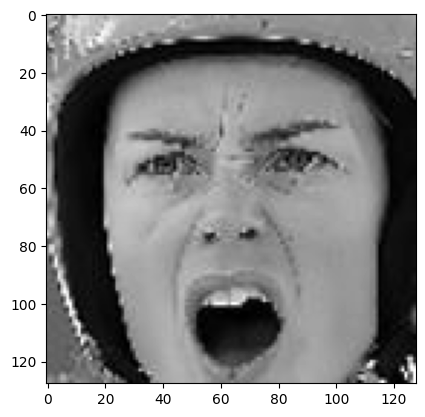

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2



train_dir = "./TRAIN/"
fine_tune_dir = "./TUNE/"

# we have 8 categories
categories = ["anger", "contempt", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

for category in categories:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show
        break
    break


# Get a list of all image files in the input directory
#image_files = [f for f in os.listdir(train_dir) if f.endswith('.jpg') or f.endswith('.png')]
path

before we run the code below, we need to make a directory to save the augmented data, we use built-in function in python to create a directory

In [ ]:
import os
#os.mkdir('test')
os.listdir(os.getcwd())

['.config', 'TUNE', 'drive', 'TRAIN', 'test', 'sample_data']

## Data Augmentation

### First Approach

In this approach, I generated the whole data, and employed a for loop to seperate train and validation data.

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

generated_data = ImageDataGenerator( rotation_range= 20,
                                    width_shift_range= 0.1,
                                    height_shift_range= 0.1,

                                    horizontal_flip=True)

def img_Augmentation(img, counter):


    # Loading a sample image
    #img = cv2.imread(input_img_address,  cv2.IMREAD_GRAYSCALE)
    # Converting the input sample image to an array
    x = img_to_array(img)
    # Reshaping the input image
    x = x.reshape((1, ) + x.shape)

    total_batch = []

    i = 0
    for batch in generated_data.flow(x, batch_size = 1,
                            save_to_dir ='./test/',
                            save_prefix ='image'+ f'{counter}', save_format ='jpeg'):

        total_batch.append(batch)
        i += 1
        if i > 3:
            break

    total_batch = np.array(total_batch, dtype= np.uint8)
    return total_batch

print("successfully augmented data produced")

successfully augmented data produced


In [ ]:
os.listdir("./test")

['image1_0_6729.jpeg',
 'image1_0_5519.jpeg',
 'image1_0_7673.jpeg',
 'image1_0_6167.jpeg',
 'image1_0_502.jpeg',
 'image1_0_1724.jpeg',
 'image1_0_9359.jpeg',
 'image1_0_8546.jpeg',
 'image1_0_2982.jpeg',
 'image1_0_8084.jpeg',
 'image1_0_1608.jpeg',
 'image1_0_3834.jpeg',
 'image1_0_3567.jpeg',
 'image1_0_7110.jpeg',
 'image1_0_3030.jpeg',
 'image1_0_7209.jpeg',
 'image1_0_5951.jpeg',
 'image1_0_8411.jpeg',
 'image1_0_2423.jpeg',
 'image1_0_9712.jpeg',
 'image1_0_8872.jpeg',
 'image1_0_8470.jpeg',
 'image1_0_1125.jpeg',
 'image1_0_7833.jpeg',
 'image1_0_1195.jpeg',
 'image1_0_8026.jpeg',
 'image1_0_2303.jpeg',
 'image1_0_5762.jpeg',
 'image1_0_1951.jpeg',
 'image1_0_4874.jpeg',
 'image1_0_8110.jpeg',
 'image1_0_8763.jpeg',
 'image1_0_5714.jpeg',
 'image1_0_541.jpeg',
 'image1_0_292.jpeg',
 'image1_0_7822.jpeg',
 'image1_0_5133.jpeg',
 'image1_0_4385.jpeg',
 'image1_0_8708.jpeg',
 'image1_0_480.jpeg',
 'image1_0_2928.jpeg',
 'image1_0_4027.jpeg',
 'image1_0_9577.jpeg',
 'image1_0_6379

## Resize data and create a dataset for the model
in this case, because all the images are in the same size, we just do a double check, but if it hasn't been mentioned that that images are not in the same size, we should have made them in an identical size.

In [ ]:
training_data = []
IMG_SIZE = 128
COUNTER = 0
i = 0

def creating_training_data():
    for category in categories:
        path = os.path.join(train_dir, category) # path to the classes directory
        class_num = categories.index(category)
        for img in os.listdir(path):
            if not img.endswith("jpeg"):
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
                    augmented_data = img_Augmentation(new_array, COUNTER+1)
                    augmented_data = augmented_data.reshape((4, new_array.shape[0], new_array.shape[0]) )
                    for i in range(4):
                        training_data.append([augmented_data[i], class_num])
                except Exception as e:
                    print("There is an error")

creating_training_data()

In [ ]:
training_data = np.array(training_data)
#training_data = training_data.reshape((40000*2 , 1 ))
training_data

C:\Users\t_mor\AppData\Local\Temp\ipykernel_21072\1214550038.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_data = np.array(training_data)


array([[array([[77, 77, 75, ..., 44, 44, 45],
               [77, 76, 74, ..., 44, 44, 45],
               [75, 75, 72, ..., 43, 44, 44],
               ...,
               [20, 20, 20, ..., 37, 35, 32],
               [20, 20, 20, ..., 29, 28, 27],
               [20, 20, 20, ..., 24, 25, 25]], dtype=uint8), 0],
       [array([[63, 64, 64, ..., 37, 37, 38],
               [57, 58, 58, ..., 37, 37, 38],
               [52, 53, 53, ..., 37, 37, 38],
               ...,
               [20, 20, 20, ..., 37, 47, 46],
               [20, 20, 20, ..., 40, 48, 42],
               [20, 20, 20, ..., 38, 47, 48]], dtype=uint8), 0],
       [array([[74, 71, 69, ..., 28, 29, 29],
               [82, 79, 77, ..., 28, 29, 29],
               [91, 88, 85, ..., 29, 29, 29],
               ...,
               [23, 23, 24, ..., 12, 19, 27],
               [23, 23, 25, ..., 24, 19, 14],
               [23, 23, 26, ..., 28, 28, 27]], dtype=uint8), 0],
       ...,
       [array([[ 88,  87,  86, ..., 129, 13

### Second Approach

In this approach, I used some built-in functions and I generated data seperately from the beginning. Since there is no need for extra for loop, second approach seems more efficient.
Like previous approach, we first try to resize all the data so as to that all of them are in the same shape.

In [17]:
training_data = []
IMG_SIZE = 128
COUNTER = 0
i = 0

def creating_training_data():
    for category in categories:
        path = os.path.join(train_dir, category) # path to the classes directory
        class_num = categories.index(category)
        for img in os.listdir(path):
            if not img.endswith("jpeg"):
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
                except Exception as e:
                    print("There is an error")



creating_training_data()
#training_data = np.array(training_data)

In [ ]:
training_data

[[array([[243, 244, 245, ..., 103,  52,  55],
         [244, 244, 245, ..., 118,  63,  52],
         [244, 245, 245, ..., 140,  80,  47],
         ...,
         [240, 241, 242, ..., 210, 203, 202],
         [240, 241, 242, ..., 210, 203, 204],
         [240, 241, 242, ..., 209, 203, 204]], dtype=uint8),
  0],
 [array([[103,  73,  81, ...,  56,  65,  14],
         [ 65,  79,  70, ...,  50,  44,  39],
         [ 72,  83,  58, ...,  39,  18,  57],
         ...,
         [251, 250, 255, ..., 163, 158, 149],
         [254, 249, 255, ..., 163, 159, 157],
         [255, 250, 255, ..., 164, 160, 163]], dtype=uint8),
  0],
 [array([[ 1,  1,  1, ..., 63, 62, 61],
         [ 1,  1,  1, ..., 55, 57, 58],
         [ 1,  1,  1, ..., 44, 48, 50],
         ...,
         [66, 65, 63, ..., 65, 54, 50],
         [68, 66, 63, ..., 67, 54, 52],
         [76, 70, 63, ..., 63, 51, 51]], dtype=uint8),
  0],
 [array([[ 76,  76,  76, ...,  95,  95, 108],
         [ 76,  76,  76, ...,  88,  85,  96],
         [ 

In [18]:
training_data = np.array([training_data])

<ipython-input-18-0793d6105865>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_data = np.array([training_data])


In [20]:
training_data = training_data.reshape(8000,2)
training_data

array([[array([[161, 170, 188, ..., 155, 157, 164],
               [172, 174, 147, ..., 152, 155, 161],
               [160, 161, 155, ..., 149, 152, 158],
               ...,
               [111, 123, 115, ...,  81,  87, 255],
               [133, 139, 127, ...,  90, 106, 252],
               [146, 143, 127, ...,  67, 172, 255]], dtype=uint8), 0],
       [array([[101, 101, 100, ...,   6,   7,  17],
               [101, 100, 100, ...,  27,  25,  13],
               [100, 100, 100, ...,  23,  21,   8],
               ...,
               [114, 114, 114, ...,  23,  22,  22],
               [113, 113, 112, ...,  22,  21,  21],
               [112, 112, 112, ...,  21,  20,  20]], dtype=uint8), 0],
       [array([[233, 232, 230, ..., 222, 221, 221],
               [232, 230, 229, ..., 220, 218, 218],
               [230, 228, 227, ..., 215, 213, 212],
               ...,
               [166, 157, 162, ..., 184, 185, 180],
               [190, 177, 165, ..., 186, 191, 181],
               [16

### Normalize Data

```
# This is formatted as code
```



In [ ]:
#training_data = training_data / 255


In [21]:
training_data[:, 0]
training_data[:, 0].shape

(8000,)

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

X = training_data[:, 0]
y = training_data[:, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(validation_split =0.2,
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    horizontal_flip=True,   # Random horizontal flip
)

#X_train = np.stack(X_train)
#X_train = X_train.reshape(len(X_train), IMG_SIZE, IMG_SIZE, 1)
#X_test = np.stack(X_test)
#X_test = X_test.reshape(len(X_test), IMG_SIZE, IMG_SIZE, 1)
# Fit the ImageDataGenerator on your training data
#datagen.fit(X_train)



In [67]:
# Specify the batch size
batch_size = 32

# Create a flow from the training data with augmentation
#train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

# Create a generator for the validation data (no augmentation)
#validation_generator = datagen.flow(X_test, y_test, batch_size=batch_size , shuffle = False)

train_generator = datagen.flow_from_directory(
    "/content/TRAIN",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', # Adjust if using different classification settings
    seed = 42
)

validation_generator = datagen.flow_from_directory(
    "/content/TRAIN",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' ,# Adjust if using different classification settings,
    shuffle = False ,
    seed = 42
)


Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


# Alexnet Implementation

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation

number_of_classes = 8 #number of output


model = Sequential([
    Conv2D(32, (9, 9), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (7, 7)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (5, 5)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(number_of_classes, activation='softmax')
])



model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 120, 120, 32)      7808      
                                                                 
 batch_normalization_21 (Ba  (None, 120, 120, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 54, 54, 64)        100416    
                                                                 
 batch_normalization_22 (Ba  (None, 54, 54, 64)       

In [63]:
for layer in model.layers:
    print(layer.output_shape)

(None, 120, 120, 32)
(None, 120, 120, 32)
(None, 120, 120, 32)
(None, 60, 60, 32)
(None, 54, 54, 64)
(None, 54, 54, 64)
(None, 54, 54, 64)
(None, 27, 27, 64)
(None, 23, 23, 128)
(None, 23, 23, 128)
(None, 23, 23, 128)
(None, 11, 11, 128)
(None, 9, 9, 256)
(None, 9, 9, 256)
(None, 9, 9, 256)
(None, 4, 4, 256)
(None, 4096)
(None, 512)
(None, 8)


## Compile AlexNet Model
At first we need to divide data to test and train. after that we compile the model and then predict test data to get the accuracy.

In [69]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate = 0.005), loss='categorical_crossentropy', metrics=['accuracy'])


In [75]:
epochs = 25

# Train the model using the augmented data generators
train_history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate_generator(validation_generator, steps=len(X_test) // batch_size)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch 1/25
6/6 [==============================] - 28s 4s/step - loss: 2.0853 - accuracy: 0.1510 - val_loss: 2.0667 - val_accuracy: 0.6875
Epoch 2/25
6/6 [==============================] - 22s 4s/step - loss: 2.0788 - accuracy: 0.1562 - val_loss: 2.0799 - val_accuracy: 0.7188
Epoch 3/25
6/6 [==============================] - 22s 4s/step - loss: 2.0886 - accuracy: 0.1094 - val_loss: 2.0853 - val_accuracy: 0.0625
Epoch 4/25
6/6 [==============================] - 27s 5s/step - loss: 2.0881 - accuracy: 0.1146 - val_loss: 2.0810 - val_accuracy: 0.0312
Epoch 5/25
6/6 [==============================] - 22s 4s/step - loss: 2.0701 - accuracy: 0.1406 - val_loss: 2.0795 - val_accuracy: 0.0312
Epoch 6/25
6/6 [==============================] - 22s 4s/step - loss: 2.0760 - accuracy: 0.1406 - val_loss: 2.1069 - val_accuracy: 0.0000e+00
Epoch 7/25
6/6 [==============================] - 22s 4s/step - loss: 2.0680 - accuracy: 0.1198 - val_loss: 2.0867 - val_accuracy: 0.0000e+00
Epoch 8/25
6/6 [==========

<ipython-input-75-64038015c64d>:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(validation_generator, steps=len(X_test) // batch_size)


Test Loss: 2.0869, Test Accuracy: 0.1219




## Plot Loss and accuracy

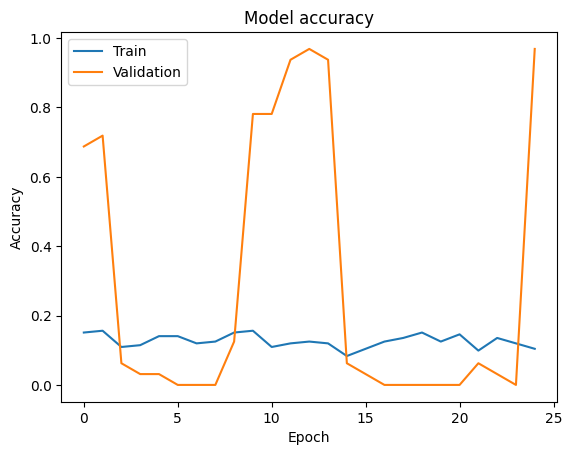

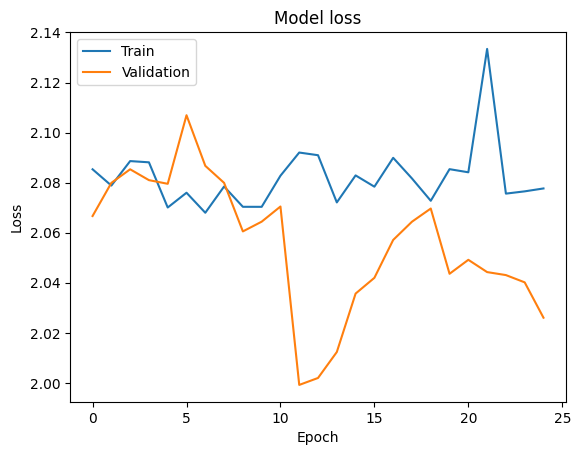

In [76]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History


# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()





## Plot ROC

200/200 [==============================] - 234s 1s/step


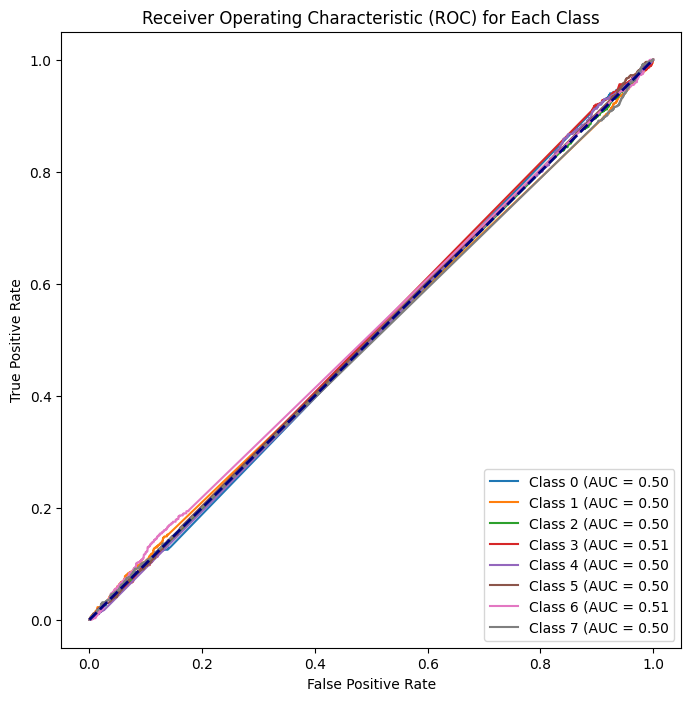

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


y_true = train_generator.classes

y_pred_prob = model.predict(train_generator)

num_classes = len(np.unique(y_true))

plt.figure(figsize=(8, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_pred_prob[:, i])
    roc_auc = roc_auc_score((y_true == i).astype(int), y_pred_prob[:, i])

    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Each Class')
plt.legend(loc='lower right')
plt.show()



## Calculate Precision,Recall, and F1 score




In [78]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the classes using the validation generator
validation_generator.reset()  # Resetting generator to ensure predictions and labels match
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels
true_classes = validation_generator.classes

# Compute and print classification report
report = classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys())
print(report)


50/51 [============================>.] - ETA: 0s

51/51 [==============================] - 49s 967ms/step
              precision    recall  f1-score   support

       anger       0.13      0.90      0.22       200
    contempt       0.15      0.06      0.09       200
     disgust       0.13      0.03      0.05       200
        fear       0.00      0.00      0.00       200
       happy       0.00      0.00      0.00       200
     neutral       0.40      0.01      0.02       200
         sad       0.07      0.01      0.02       200
    surprise       0.20      0.01      0.01       200

    accuracy                           0.13      1600
   macro avg       0.13      0.13      0.05      1600
weighted avg       0.13      0.13      0.05      1600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


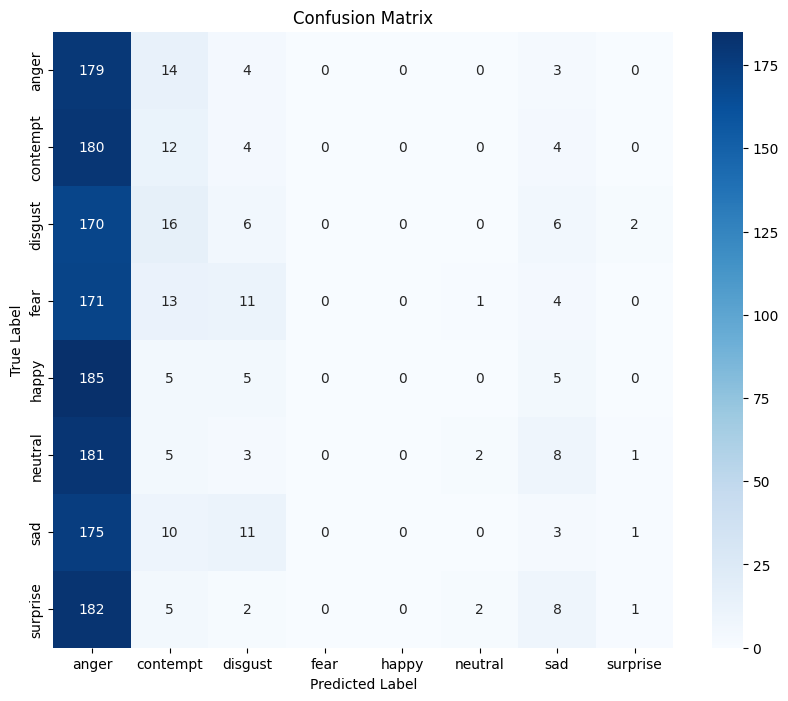

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# VGGNet Implementation





In [89]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation

number_of_classes = 8 #number of output


model_VGGNet = Sequential([
    Conv2D(16, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('relu'),


    Conv2D(16, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3)),
    BatchNormalization(),
    Activation('relu'),


    Conv2D(32, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),


    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),


    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(number_of_classes, activation='softmax')
])



model_VGGNet.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 batch_normalization_46 (Ba  (None, 126, 126, 16)      64        
 tchNormalization)                                               
                                                                 
 activation_45 (Activation)  (None, 126, 126, 16)      0         
                                                                 
 conv2d_57 (Conv2D)          (None, 124, 124, 16)      2320      
                                                                 
 batch_normalization_47 (Ba  (None, 124, 124, 16)      64        
 tchNormalization)                                               
                                                                 
 activation_46 (Activation)  (None, 124, 124, 16)    

## Compile VGGNet Model

In [90]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Compile the model
model_VGGNet.compile(optimizer=Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
epochs = 10

# Train the model using the augmented data generators
train_history_VGGNet = model_VGGNet.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model_VGGNet.evaluate_generator(validation_generator, steps=len(X_test) // batch_size)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch 1/10
6/6 [==============================] - 26s 2s/step - loss: 91.0636 - accuracy: 0.1354 - val_loss: 134645.5000 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 27.7681 - accuracy: 0.1406 - val_loss: 284.4359 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 12s 2s/step - loss: 5.4690 - accuracy: 0.1510 - val_loss: 86.2436 - val_accuracy: 0.0312
Epoch 4/10
6/6 [==============================] - 10s 2s/step - loss: 5.3163 - accuracy: 0.0781 - val_loss: 335.9535 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 3.3083 - accuracy: 0.1302 - val_loss: 126.4926 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 14s 2s/step - loss: 2.2167 - accuracy: 0.1198 - val_loss: 6.8865 - val_accuracy: 0.8438
Epoch 7/10
6/6 [==============================] - 13s 2s/step - loss: 2.6177 - accuracy: 0.1042 - val_loss: 26.4391 - val_accuracy: 0.0000e+00

<ipython-input-91-d5586fa0342e>:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model_VGGNet.evaluate_generator(validation_generator, steps=len(X_test) // batch_size)


Test Loss: 2.1708, Test Accuracy: 0.1300




## Plot Loss and accuracy

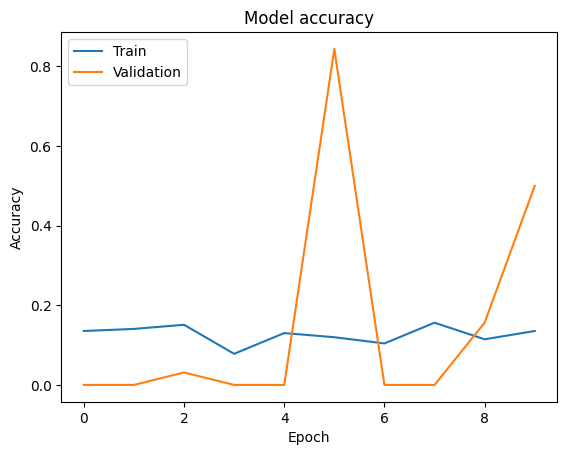

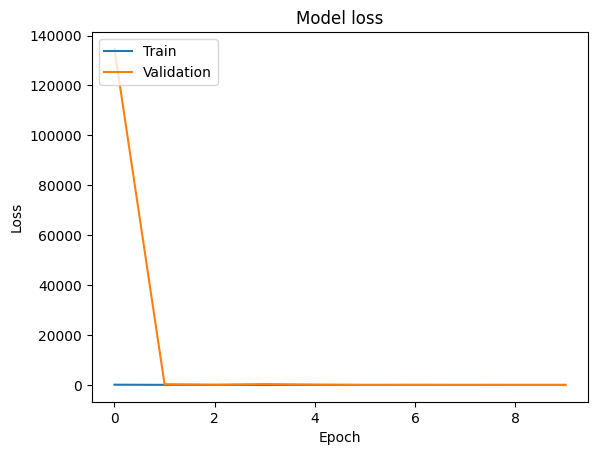

In [92]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History


# Plot training & validation accuracy values
plt.plot(train_history_VGGNet.history['accuracy'])
plt.plot(train_history_VGGNet.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(train_history_VGGNet.history['loss'])
plt.plot(train_history_VGGNet.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Plot ROC

200/200 [==============================] - 204s 1s/step


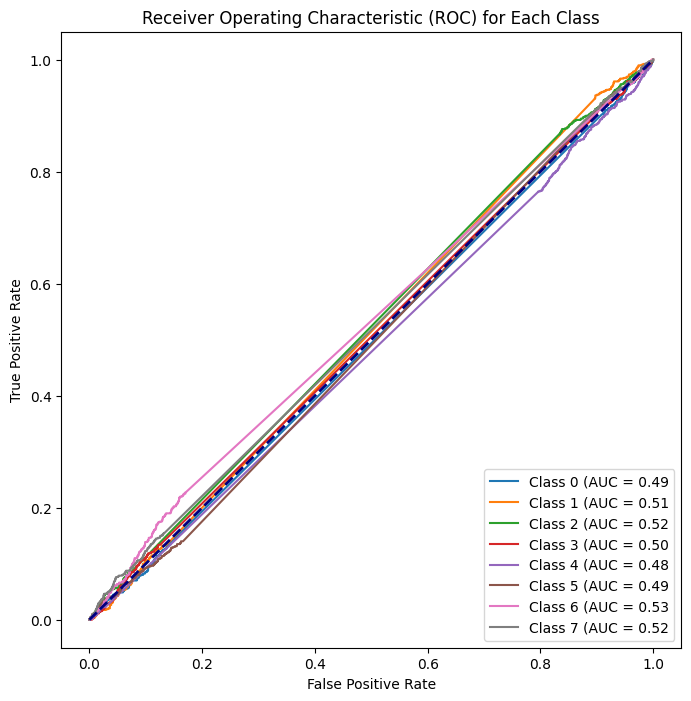

In [93]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


y_true = train_generator.classes

y_pred_prob = model.predict(train_generator)

num_classes = len(np.unique(y_true))

plt.figure(figsize=(8, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_pred_prob[:, i])
    roc_auc = roc_auc_score((y_true == i).astype(int), y_pred_prob[:, i])

    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Each Class')
plt.legend(loc='lower right')
plt.show()

## Calculate Precision,Recall, and F1 score

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the classes using the validation generator
validation_generator.reset()  # Resetting generator to ensure predictions and labels match
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels
true_classes = validation_generator.classes

# Compute and print classification report
report = classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys())
print(report)